## Observations and Insights 
- Capomulin and Ramican treatments deliver the lowest 'Final Tumor Volume' upon completion of study
- The heavier the mouse, the larger the tumor. Tumor volume is highly correlated to weight.
- 25 mice were used in trials across all regimens except for Propriva (24) and Stelasyn (24).

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
orig_df = pd.merge(mouse_metadata, study_results, how="outer",on="Mouse ID")

# Display the data table for preview
orig_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice
mice = len(orig_df["Mouse ID"].unique())
print(f"The number of mice is {mice}")

The number of mice is 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = orig_df[orig_df.duplicated(["Timepoint","Mouse ID"],keep=False)]
duplicate_mice = duplicates["Mouse ID"].unique()
print(duplicate_mice)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
orig_df.loc[orig_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = orig_df[orig_df["Mouse ID"]!="g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
mice = len(clean_df["Mouse ID"].unique())
print(f"The number of mice is {mice}")

The number of mice is 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gb = clean_df.groupby("Drug Regimen")

# Calculations
mean = regimen_gb["Tumor Volume (mm3)"].mean()
median = regimen_gb["Tumor Volume (mm3)"].median()
var = regimen_gb["Tumor Volume (mm3)"].var()
std = regimen_gb["Tumor Volume (mm3)"].std()
sem = regimen_gb["Tumor Volume (mm3)"].sem()

# Create summary table
summary_table = pd.concat([mean,median,var,std,sem],axis=1,join='outer')
summary_table.columns = ["Tumor Volume Mean","Tumor Volume Median","Tumor Volume Variance","Tumor Volume Std Dev","Tumor Volume SEM"]
summary_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

(20, 25.2)

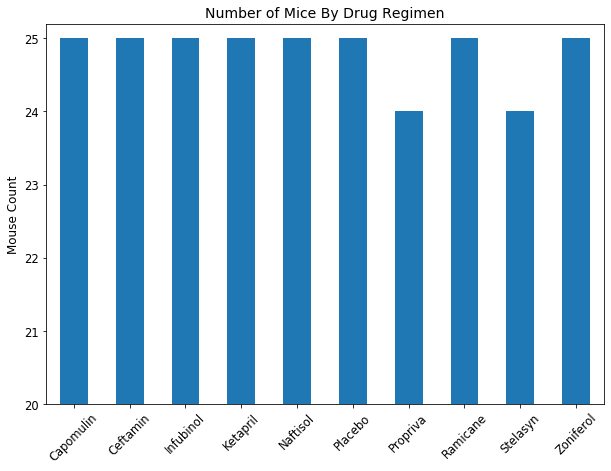

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
dropped_df = clean_df.drop_duplicates("Mouse ID")
dropped_gb = dropped_df.groupby("Drug Regimen")
ax = dropped_gb["Mouse ID"].count().plot(kind="bar",rot=45,align="center",figsize=(10,7))
ax.set_ylabel('Mouse Count', fontsize = 12)
ax.set_xlabel("")
ax.set_title("Number of Mice By Drug Regimen",size=14)
plt.yticks(fontsize=11.5)
plt.xticks(fontsize=11.5)
plt.ylim(20,25.2)

(20, 25.2)

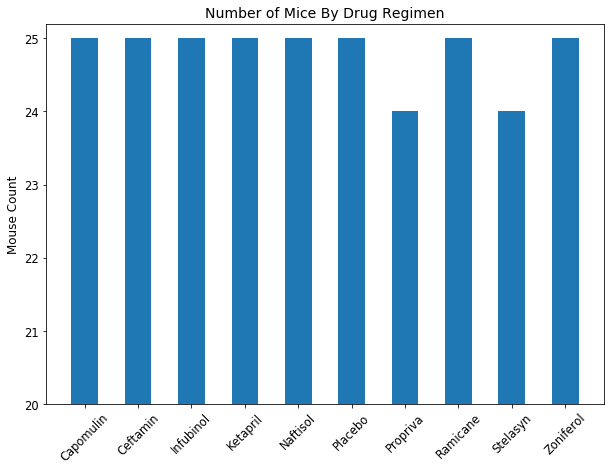

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_values = np.arange(len(dropped_gb["Drug Regimen"]))
labels = [x[0] for x in dropped_gb["Drug Regimen"].unique()]

# Plot bar chart
plt.figure(figsize=(10,7))
plt.bar(x_values,dropped_gb["Mouse ID"].count(),align="center",width=.5)
plt.xticks(x_values,labels,rotation=45)
plt.title("Number of Mice By Drug Regimen",size=14)
plt.ylabel("Mouse Count",size=12)
plt.yticks(fontsize=11.5)
plt.xticks(fontsize=11.5)
plt.ylim(20,25.2)

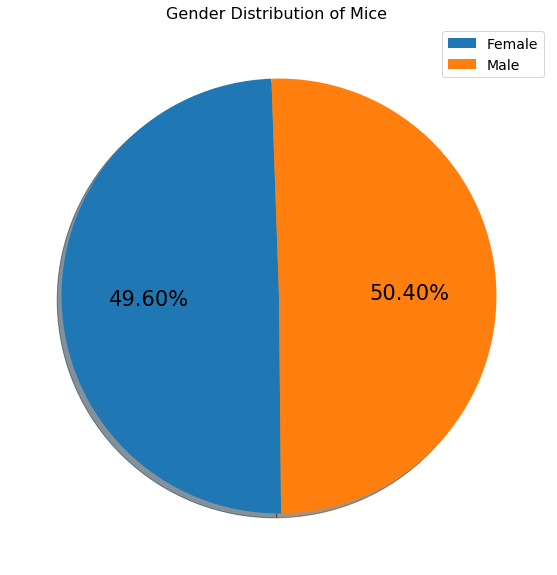

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax = dropped_df.groupby("Sex")["Mouse ID"].count().plot(kind="pie",autopct="%1.2f%%",label="",textprops={"fontsize": 21},startangle=92,figsize=(10,10),shadow=True,radius=1,labeldistance=None)
ax.set_title("Gender Distribution of Mice ",size=16)
ax.legend(loc='upper right',prop={'size': 14})

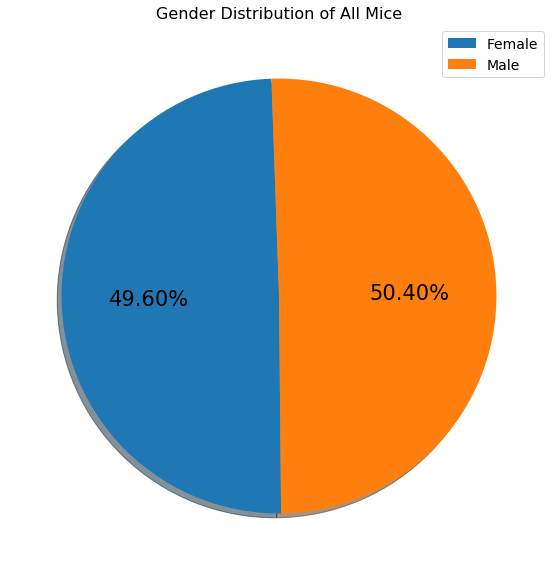

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,10))
plt.pie(dropped_df.groupby("Sex")["Mouse ID"].count(),autopct="%1.2f%%",startangle=92,textprops={"fontsize": 21},shadow=True,radius=1)
plt.title("Gender Distribution of All Mice",size=16)
plt.legend(["Female","Male"],prop={'size': 14})

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")|(clean_df["Drug Regimen"]=="Ramicane")|(clean_df["Drug Regimen"]=="Infubinol")|(clean_df["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = filtered_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(filtered_df,max_timepoint_df,on="Mouse ID")
tumor_vol_df = tumor_vol_df.loc[tumor_vol_df["Timepoint_x"]==tumor_vol_df["Timepoint_y"]]
tumor_vol_df = tumor_vol_df[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
tumor_vol_df = tumor_vol_df.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})
tumor_vol_df.head()

,Mouse ID,Drug Regimen,Final Tumor Volume
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472


In [14]:
# Determining if there are any potential outliers across all four treatment regimens.
capomulin = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]=="Capomulin"]["Final Tumor Volume"]
ramicane = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]=="Ramicane"]["Final Tumor Volume"]
infubinol = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]=="Infubinol"]["Final Tumor Volume"]
ceftamin = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]=="Ceftamin"]["Final Tumor Volume"]

# Create list of regimens for for loop
treatments = [capomulin, ramicane, infubinol, ceftamin]

# Check for outliers in each regimen
for treatment in treatments:
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [round(x,2) for x in treatment if x<lower_bound or x>upper_bound]
    print(outliers)

[]
[]
[36.32]
[]


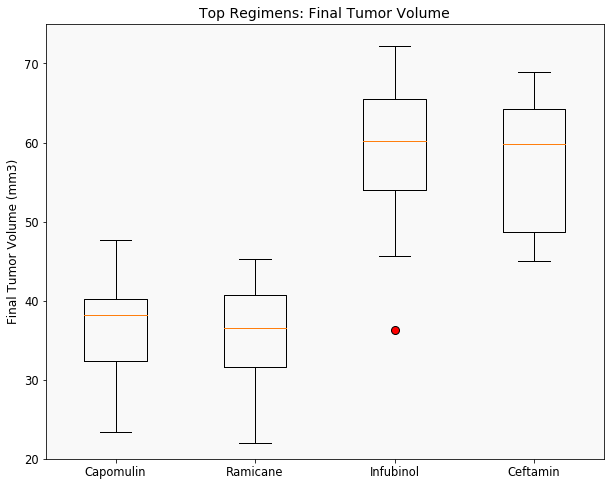

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capomulin, ramicane, infubinol, ceftamin]
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Top Regimens: Final Tumor Volume',size=14)
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],fontsize=11.5)
plt.ylabel("Final Tumor Volume (mm3)",size=12)
plt.yticks(fontsize=11.5)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none', markeredgecolor='black')
ax1.boxplot(data,flierprops=flierprops)
ax1.set_ylim(20,75)
ax1.set_facecolor("#F9F9F9")

## Line and Scatter Plots

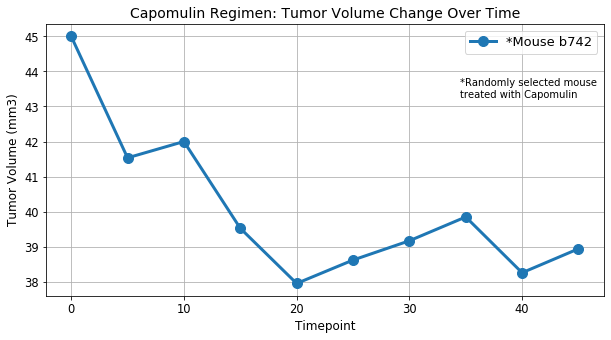

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_values = clean_df.loc[clean_df["Mouse ID"]=="b742","Timepoint"]
y_values = clean_df.loc[clean_df["Mouse ID"]=="b742","Tumor Volume (mm3)"]

# Plot line graph
plt.figure(figsize=(10,5))
plt.plot(x_values, y_values,linewidth=3,marker="o",markersize=10)
plt.ylabel("Tumor Volume (mm3)",size=12)
plt.xlabel("Timepoint",size=12)
plt.title("Capomulin Regimen: Tumor Volume Change Over Time",size=14)
plt.legend(labels=["*Mouse b742"],loc="best",prop={'size': 13})
plt.annotate("""*Randomly selected mouse
treated with Capomulin""",(34.5,43.25))
plt.yticks(fontsize=11.5)
plt.xticks(fontsize=11.5)
plt.grid()

(array([14., 16., 18., 20., 22., 24., 26.]),
 <a list of 7 Text xticklabel objects>)

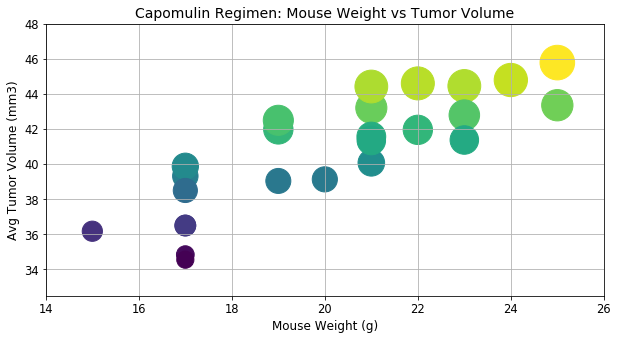

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Plot scatter plot
plt.figure(figsize=(10,5))
plt.scatter(weight,avg_tumor_vol,c=avg_tumor_vol,s=[i**2-900 for i in avg_tumor_vol])
plt.title("Capomulin Regimen: Mouse Weight vs Tumor Volume",size=14)
plt.xlabel("Mouse Weight (g)",size=12)
plt.ylabel("Avg Tumor Volume (mm3)",size=12)
plt.xlim(14,26)
plt.ylim(32.5,48)
plt.grid()
plt.yticks(fontsize=11.5)
plt.xticks(fontsize=11.5)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient for weight and average tumor volume is {round(st.pearsonr(weight,avg_tumor_vol)[0],4)}.")

The correlation coefficient for weight and average tumor volume is 0.8419.


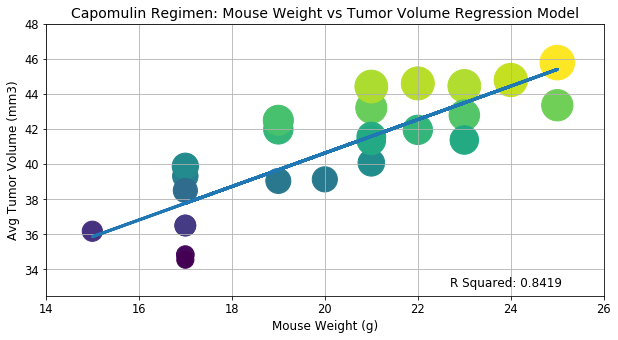

In [19]:
# Calculate regression line values
[slope, intercept, rvalue, pvalue, std] = st.linregress(weight,avg_tumor_vol)

# pull scatter plot inputs from above
plt.figure(figsize=(10,5))
plt.scatter(weight,avg_tumor_vol,c=avg_tumor_vol,s=[i**2-900 for i in avg_tumor_vol])
plt.title("Capomulin Regimen: Mouse Weight vs Tumor Volume Regression Model",size=14)
plt.xlabel("Mouse Weight (g)",size=12)
plt.ylabel("Avg Tumor Volume (mm3)",size=12)
plt.xlim(14,26)
plt.ylim(32.5,48)
plt.annotate(f"R Squared: {round(rvalue,4)}",(22.7,33),size=12)
plt.grid()
plt.yticks(fontsize=11.5)
plt.xticks(fontsize=11.5)

# plot regression line
y = weight*slope+intercept
plt.plot(weight, y,linewidth=3)